In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

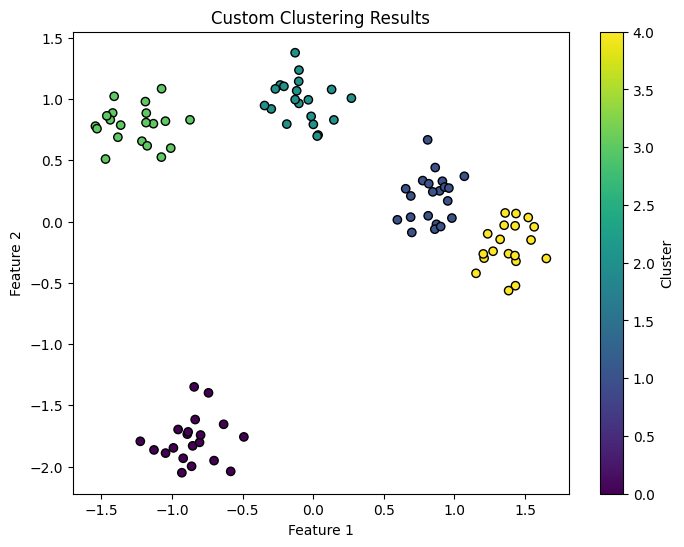

In [50]:
import numpy as np

def initial_clustering(data, dmin):
  """
  Performs initial clustering based on minimum distance threshold.

  Args:
      data: A numpy array representing the data points.
      dmin: The minimum distance threshold for considering points in a cluster.

  Returns:
      A list of clusters, where each cluster is a list of data point indices.
  """
  n = data.shape[0]
  clusters = []
  visited = set()
  for i in range(n):
    if i in visited:
      continue
    cluster = [i]
    visited.add(i)
    for j in range(i + 1, n):
      if j in visited:
        continue
      distance = np.linalg.norm(data[i] - data[j])
      if distance <= dmin:
        cluster.append(j)
        visited.add(j)
    clusters.append(cluster)
  return clusters

def calculate_centroids(clusters, data):
  """
  Calculates the centroid (mean) for each cluster.

  Args:
      clusters: A list of clusters, where each cluster is a list of data point indices.
      data: A numpy array representing the data points.

  Returns:
      A list of centroids, where each centroid is a data point.
  """
  centroids = []
  for cluster in clusters:
    centroid = np.mean(data[cluster], axis=0)
    centroids.append(centroid)
  return centroids


def calculate_pairwise_distances(data):
  """
  Calculates the pairwise distances between all data points.

  Args:
      data: A numpy array representing the data points.

  Returns:
      A numpy array representing the pairwise distance matrix.
  """
  n = data.shape[0]
  distances = np.zeros((n, n))
  for i in range(n):
    for j in range(i + 1, n):
      distance = np.linalg.norm(data[i] - data[j])
      distances[i, j] = distance
      distances[j, i] = distance  # Fill the other half for symmetry
  return distances

def kmeans_refine(data, centroids):
  """
  Refines the clustering using K-means algorithm.

  Args:
      data: A numpy array representing the data points.
      centroids: A list of initial centroids for K-means.

  Returns:
      A list of clusters after K-means refinement.
  """
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters=len(centroids), init=centroids, n_init=1)
  kmeans.fit(data)
  return kmeans.labels_

import matplotlib.pyplot as plt

def visualize_clusters(data, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')
    plt.title('Custom Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.grid(False)
    plt.show()


def calculate_average_distance(data):
  distances = []
  n = len(data)
  for i in range(n):
      for j in range(i + 1, n):
          distances.append(np.linalg.norm(data[i] - data[j]))
  return np.mean(distances)

def heuristic_d_min(data, fraction):
    average_distance = calculate_average_distance(data)
    d_min = fraction * average_distance
    return d_min

def main():
  centers = 5
  data, true_labels = make_blobs(n_samples=100, centers=centers, random_state=)
  data = StandardScaler().fit_transform(data)

  # distances = calculate_pairwise_distances(data)
  # dmin = np.mean(distances[distances != 0])  # Exclude zeros (diagonal)

  fraction = 1/2
  dmin = heuristic_d_min(data, fraction)

  # Perform initial clustering
  clusters = initial_clustering(data, dmin)

  # Calculate centroids
  centroids = calculate_centroids(clusters, data)

  # Refine clusters using K-means
  labels = kmeans_refine(data, centroids)

  # Visualize the clusters
  visualize_clusters(data, labels)

if __name__ == "__main__":
  main()